<a href="https://colab.research.google.com/github/VanshikaNehra23/STC_DS_Tasks/blob/main/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input,Conv2D, Dense,Flatten,Dropout,GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0 , x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
K=len(set(y_train))
print("number of classes:",K);

number of classes: 10


In [ ]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)
model=Model(i,x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.7825 - accuracy: 0.3425 - val_loss: 1.3042 - val_accuracy: 0.5316
Epoch 2/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3158 - accuracy: 0.5261 - val_loss: 1.1202 - val_accuracy: 0.5995
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1679 - accuracy: 0.5829 - val_loss: 1.0481 - val_accuracy: 0.6290
Epoch 4/15
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0843 - accuracy: 0.6143 - val_loss: 0.9902 - val_accuracy: 0.6541
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9994 - accuracy: 0.6422 - val_loss: 0.9601 - val_accuracy: 0.6660
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9380 - accuracy: 0.6662 - val_loss: 0.9564 - val_accuracy: 0.6711
Epoch 7/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8780 - accuracy: 0.6866 - val_loss: 0.9004 -

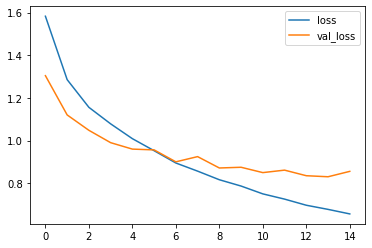

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

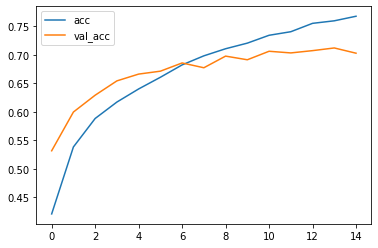

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix,without normalization
[[734  10  33  25  44   9   6  17  93  29]
 [ 25 767   8  17   5   4  16   4  61  93]
 [ 58   5 524  86 164  64  36  32  25   6]
 [ 11   7  63 539 106 163  41  28  19  23]
 [ 19   3  41  54 761  26  18  59  16   3]
 [ 16   6  35 213  72 566  16  58  12   6]
 [  3   1  53  89  89  28 707   9  13   8]
 [ 16   0  21  30  79  48   6 784   6  10]
 [ 48  16   7  12   9   5   4   3 880  16]
 [ 50  61  14  17   7   6   2  22  57 764]]


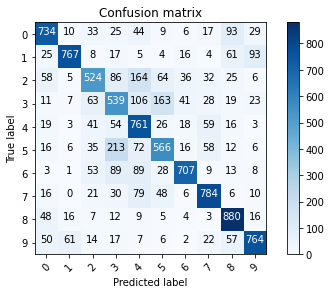

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]> thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

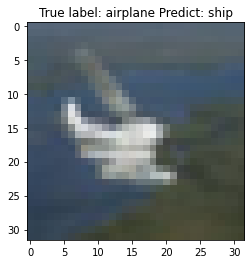

In [ ]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predict: %s"%(labels[y_test[i]],labels[p_test[i]]));